In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#afisam data setul wholesales
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
# informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
# scoatem matricea X
X = df.values

In [8]:
X

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [10]:
# creem o lista goala unde vom pastra scorurile noatre
scores = []
for k in range(2,11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    scores.append(silhouette_score(X, y_pred))

In [11]:
scores

[0.4180308798559112,
 -0.06732057916843202,
 0.20799045972423155,
 0.0722395173823217,
 0.17269430544882522,
 0.21203917537344233,
 -0.08394700462601563,
 -0.025205640604682673,
 -0.07160617963928725]

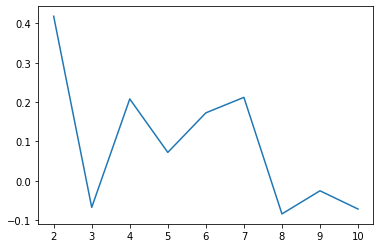

In [12]:
plt.plot(range(2,11), scores)

In [13]:
#afisam valorile cind este 5
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
y_pred = gmm.predict(X)

In [14]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 0,
       2, 2, 1, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 0, 3, 1, 1, 0, 3, 1, 1, 0, 3, 1, 4, 1, 1, 0, 1,
       3, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 1, 0, 1, 4, 4, 2,
       0, 0, 0, 0, 1, 2, 1, 3, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 0, 1,
       0, 3, 3, 0, 3, 2, 3, 2, 0, 3, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 3, 0, 1, 0, 1, 3, 1, 0, 1, 0, 3, 1, 3, 1, 0, 1, 0,
       0, 3, 0, 1, 0, 0, 1, 0, 3, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       1, 2, 1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [15]:
# afisam vectorii medii cu gmm
gmm.means_

array([[1.00000000e+00, 2.53629952e+00, 1.45592059e+04, 2.20817512e+03,
        2.80081535e+03, 3.72831321e+03, 4.09861420e+02, 1.05408373e+03],
       [2.00000000e+00, 2.60739885e+00, 8.09783429e+03, 9.38574179e+03,
        1.47089612e+04, 1.51696838e+03, 6.50168220e+03, 1.59582855e+03],
       [1.10464302e+00, 2.57907722e+00, 2.78709366e+04, 1.46389940e+04,
        1.08841563e+04, 1.28177295e+04, 1.30306895e+03, 7.80213029e+03],
       [1.00000000e+00, 2.40188246e+00, 5.86269698e+03, 4.77008015e+03,
        6.05460096e+03, 1.28059977e+03, 1.95729921e+03, 1.00408994e+03],
       [2.00000000e+00, 2.80000000e+00, 2.56030000e+04, 4.34606000e+04,
        6.14722000e+04, 2.63600000e+03, 2.99742000e+04, 2.70880000e+03]])

In [16]:
# facem ca un tabel, analiza prescriptiva
cluster_table = pd.DataFrame(gmm.means_,columns = df.columns)

In [17]:
cluster_table

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.000000,2.536300,14559.205877,2208.175119,2800.815349,3728.313212,409.861420,1054.083734
1,2.000000,2.607399,8097.834292,9385.741787,14708.961168,1516.968379,6501.682201,1595.828547
2,1.104643,2.579077,27870.936550,14638.993980,10884.156324,12817.729483,1303.068946,7802.130293
3,1.000000,2.401882,5862.696977,4770.080152,6054.600964,1280.599774,1957.299207,1004.089938
4,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
